In [ ]:
import numpy as np
import pandas as pd
from functions import *
import matplotlib.pyplot as plt
from scipy.stats import norm

# if the folder "./results/python_output" is nonempty, just load the data


In [9]:
NAME_CURRENCIES = ["BTC", 'ADA', 'DOGE', 'DOT', 'ETH', 'LTC', 'SOL', 'TRX', 'XLM', 'XRP']


data_dictionary = {name: None for name in NAME_CURRENCIES}
df = pd.read_csv("./data/crypto21to24python.csv")

set(df["symbol"])

n = df.shape[0]//len(NAME_CURRENCIES)
n

1461

In [10]:
cryp_dict = {key: df[df["symbol"] == key][["open", "high", "low", "close"]] for key in NAME_CURRENCIES}


close_matrix = np.zeros([len(NAME_CURRENCIES), n])
open_matrix = np.zeros([len(NAME_CURRENCIES), n])
high_matrix = np.zeros([len(NAME_CURRENCIES), n])
low_matrix = np.zeros([len(NAME_CURRENCIES), n])


for name_idx in range(len(NAME_CURRENCIES)):
    name = NAME_CURRENCIES[name_idx]
    for idx in range(n):
        # print(name)
        close_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["close"]
        open_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["open"]
        high_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["high"]
        low_matrix[name_idx, idx] = cryp_dict[name].iloc[idx]["low"]


close_matrix = np.log(close_matrix[:, 1:]) - np.log(close_matrix[:, :-1])
open_matrix = np.log(open_matrix[:, 1:]) - np.log(open_matrix[:, :-1])
high_matrix = np.log(high_matrix[:, 1:]) - np.log(high_matrix[:, :-1])
low_matrix = np.log(low_matrix[:, 1:]) - np.log(low_matrix[:, :-1])


In [11]:
from scipy.stats import norm

k_list =  list(range(100, 400, 5))  # 60 enties
B = 50

p = 0.025
z = norm.ppf(1 - p)


In [12]:


btc_close = close_matrix[0, :]
rest_close = close_matrix

delta_close = np.zeros([len(k_list), len(NAME_CURRENCIES)])
delta_boot_close = np.zeros([len(k_list), len(NAME_CURRENCIES), B])

for k_idx in range(len(k_list)):
    print(k_idx)
    k = k_list[k_idx]
    for i in range(len(NAME_CURRENCIES)):
        delta_close[k_idx, i] = delta(btc_close, rest_close[i, :], k)
        for b in range(B):
            multi_b = np.random.exponential(scale=1.0, size=n)
            delta_boot_close[k_idx, i, b] = delta_boot(btc_close, rest_close[i, :], multi_b, k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [13]:
# save data
with open("./results/python_output/close_pos_boot.npy", "wb") as f:  
    np.save(f, delta_close)
    np.save(f, delta_boot_close)

In [20]:
# load data
with open("./results/python_output/close_pos_boot.npy", "rb") as f:
    delta_close = np.load(f)
    delta_boot_close = np.load(f)

In [14]:
delta_boot_close_sig = delta_boot_close.std(2)
delta_boot_close_upper = delta_close + z * delta_boot_close_sig
delta_boot_close_lower = delta_close - z * delta_boot_close_sig

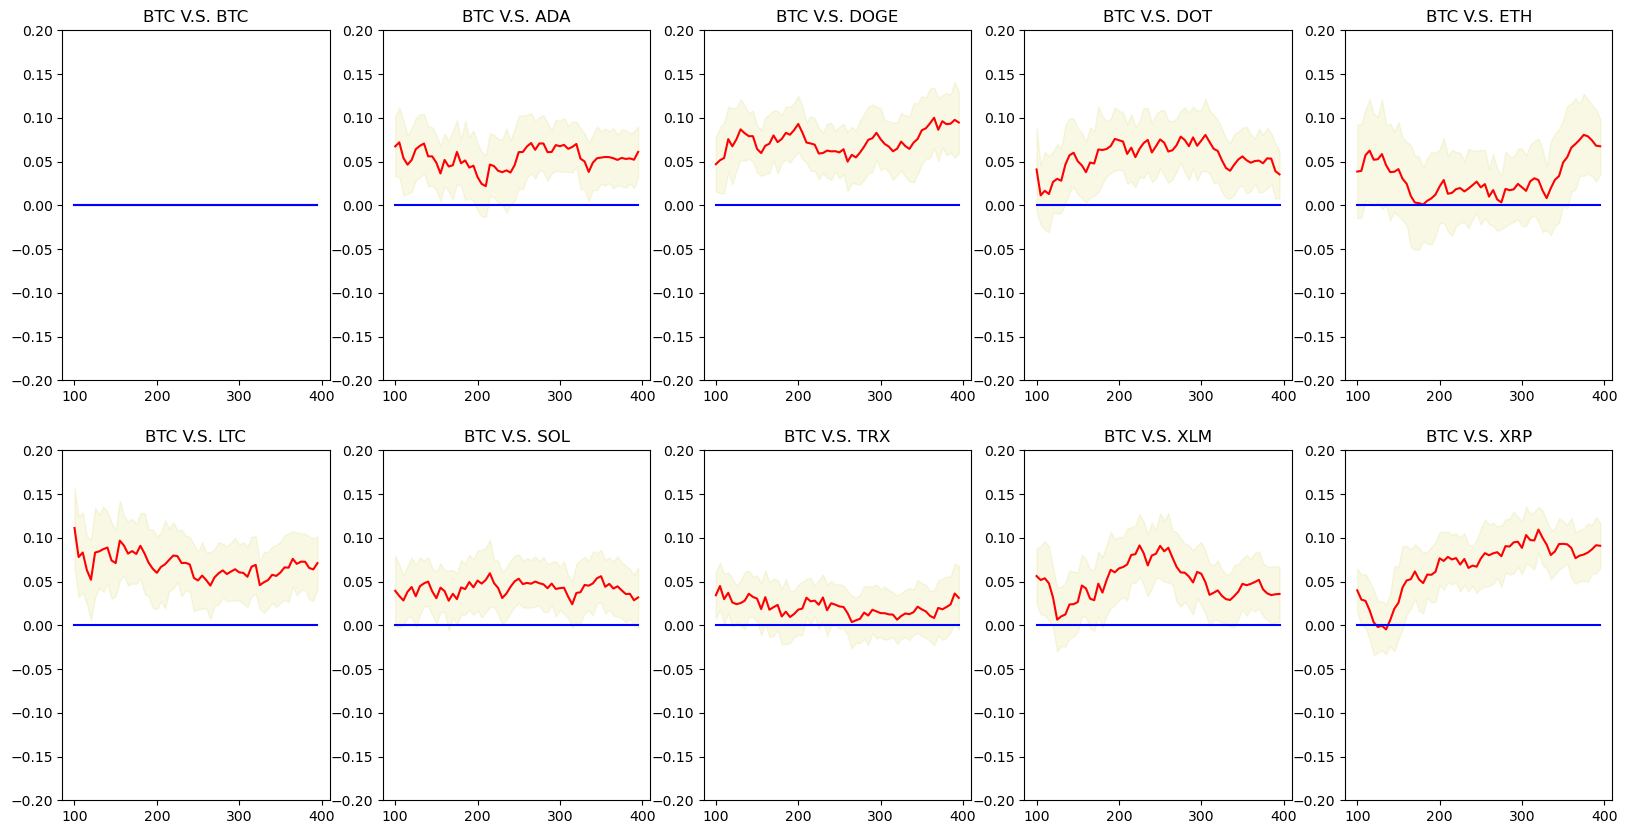

In [15]:
num_row = 2; num_column = 5;
fig, axs = plt.subplots(num_row, num_column, figsize=(20, 10))

v_max = 0.2
v_min = -0.2

for r in range(num_row):
    for c in range(num_column):
         idx = int(r * num_column + c)
         axs[r, c].plot(k_list, delta_close[:, idx], c="red")
         axs[r, c].plot(k_list, np.zeros([len(k_list)]), c="blue")
         axs[r, c].fill_between(k_list, delta_boot_close_lower[:, idx], delta_boot_close_upper[:, idx], color="y", alpha=0.1)
         axs[r, c].set_title('BTC V.S. {}'.format(NAME_CURRENCIES[idx]))
         axs[r, c].set_ylim([v_min, v_max])


In [16]:
btc_close = close_matrix[0, :]
rest_close = close_matrix

delta_close_neg = np.zeros([len(k_list), len(NAME_CURRENCIES)])
delta_boot_close_neg = np.zeros([len(k_list), len(NAME_CURRENCIES), B])

for k_idx in range(len(k_list)):
    print(k_idx)
    k = k_list[k_idx]
    for i in range(len(NAME_CURRENCIES)):
        delta_close_neg[k_idx, i] = delta(-btc_close, -rest_close[i, :], k)
        for b in range(B):
            multi_b = np.random.exponential(scale=1.0, size=n)
            delta_boot_close_neg[k_idx, i, b] = delta_boot(-btc_close, -rest_close[i, :], multi_b, k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [17]:
delta_boot_close_neg_sig = delta_boot_close_neg.std(2)
delta_boot_close_neg_upper = delta_close_neg + z * delta_boot_close_neg_sig
delta_boot_close_neg_lower = delta_close_neg - z * delta_boot_close_neg_sig

In [18]:
# save data

with open("./results/python_output/close_neg_boot.npy", "wb") as f:  
    np.save(f, delta_close_neg)
    np.save(f, delta_boot_close_neg)

In [ ]:
# load data
with open("./results/python_output/close_neg_boot.npy", "rb") as f:
    delta_close_neg = np.load(f)
    delta_boot_close_neg = np.load(f)

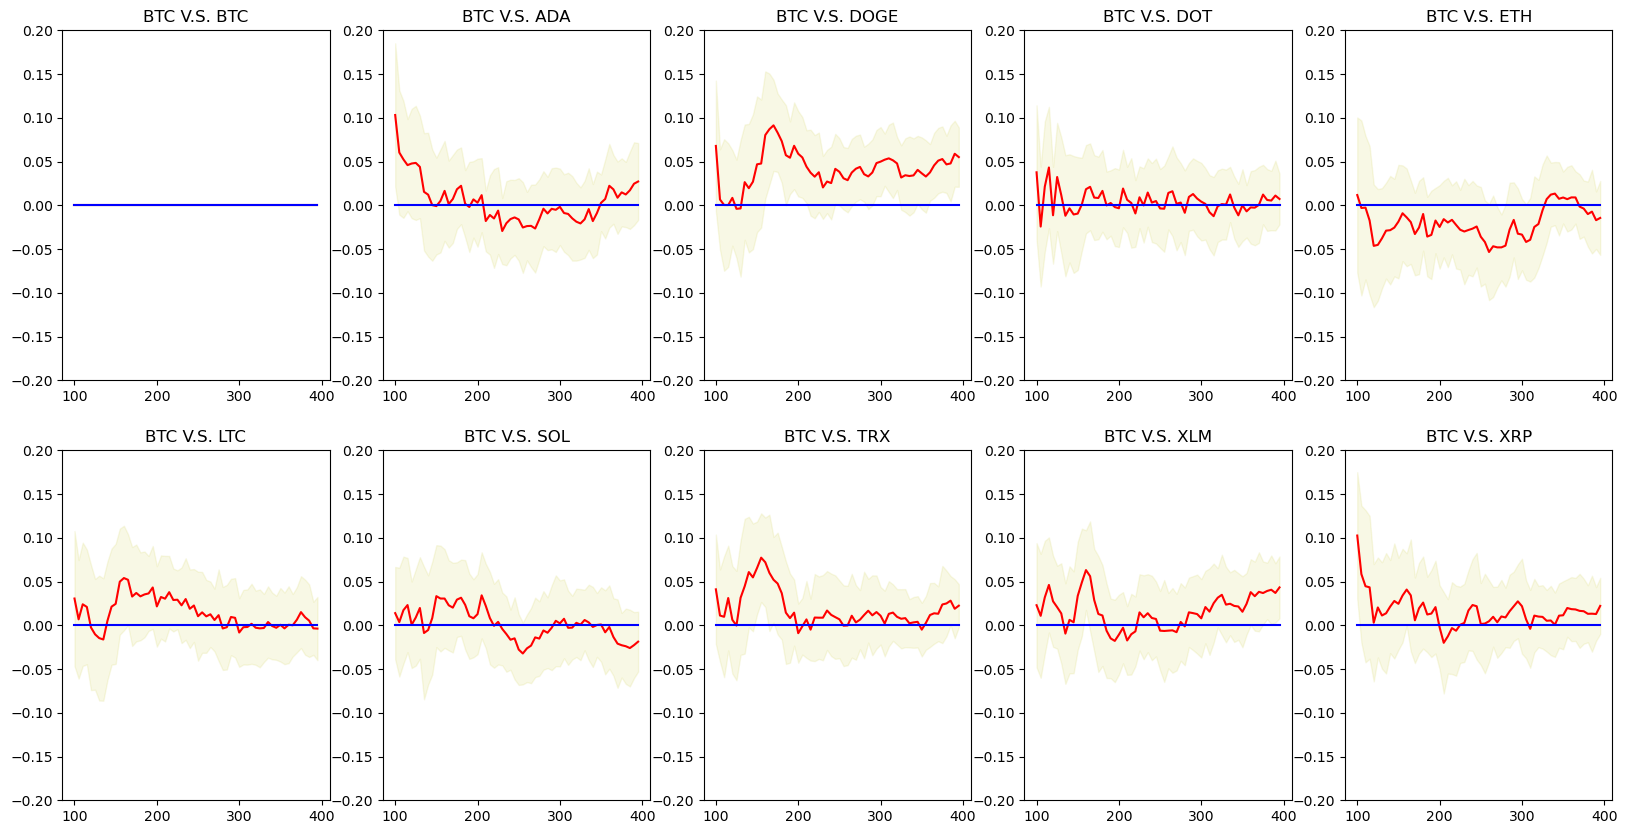

In [21]:
num_row = 2; num_column = 5;
fig, axs = plt.subplots(num_row, num_column, figsize=(20, 10))

v_max = 0.2
v_min = -0.2

for r in range(num_row):
    for c in range(num_column):
         idx = int(r * num_column + c)
         axs[r, c].plot(k_list, delta_close_neg[:, idx], c="red")
         axs[r, c].plot(k_list, np.zeros([len(k_list)]), c="blue")
         axs[r, c].fill_between(k_list, delta_boot_close_neg_lower[:, idx], delta_boot_close_neg_upper[:, idx], color="y", alpha=0.1)
         axs[r, c].set_title('BTC V.S. {}'.format(NAME_CURRENCIES[idx]))
         axs[r, c].set_ylim([v_min, v_max])